In [19]:
# pip install numpy scipy scikit-learn #--- to the anaconda terminal
# pip install --user pmdarima #---installing auto-arima
# pip install -U statsmodels #---instaling statsmodels

# 1. Importowanie bibliotek
import pandas as pd
from pandas import DataFrame
import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima import model_selection
import numpy as np


In [20]:
# 2. Odczyt danych z pliku analiza.csv
import pandas 
df =pandas.read_csv("D:\\Education\\3 rok AGH\\5 Semestr\\AiBD\\pandas_project\\Lab_10_Matyiashchyk\\analiza.csv", sep = ",", decimal = ",")
print(df.head(7), df.describe())
print(len(df))
print(df.shape)


      Data  Rezerwacja
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121
5  1949-06         135
6  1949-07         148        Rezerwacja
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
144
(144, 2)


Text(0.5, 1.0, 'Wykres Rezerwacji od Daty')

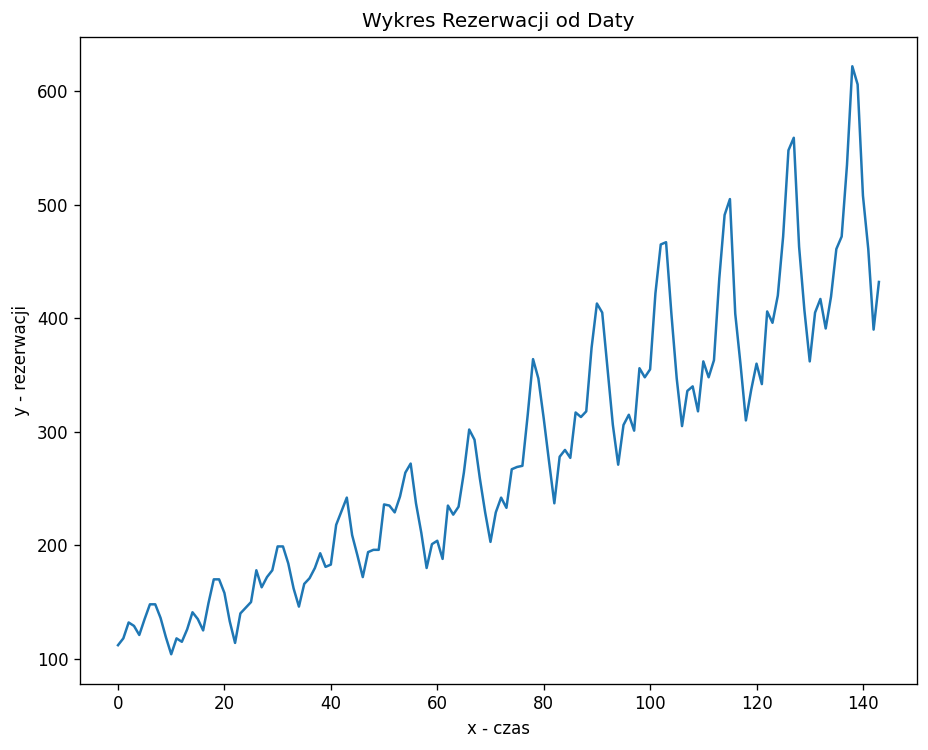

In [21]:
# 3. Wykonanie wykresów Uzyskanych danych

y=df["Rezerwacja"]

#plt.plot(df_rezerwacja, df_data)
plt.plot(y)
# naming the x axis 
plt.xlabel('x - czas') 
# naming the y axis 
plt.ylabel('y - rezerwacji') 
# giving a title to my graph 
plt.title('Wykres Rezerwacji od Daty') 

# Zestaw danych dotyczących pasażerów linii lotniczych jest przykładem szeregu niestacjonarnego.
# Wraz z upływem czasu wzrasta zarówno średnia, jak i wariancja, widoczny jest także sezonowy charakter
# danych będący naturalnym przeciwieństwem stacjonarności
# Widzimy że wykres ma tendencję 

In [22]:
# 4. Obliczanie ADF
# Sprawdzenie czy szereg czasu jest stacjonarny
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller

df1 = read_csv("D:\\Education\\3 rok AGH\\5 Semestr\\AiBD\\pandas_project\\Lab_10_Matyiashchyk\\analiza.csv", header=0, names = ['value'], index_col=0)
# Otwieramy plik inaczej aby móc stosować funkcję value dla danych w DataFrame
result = adfuller(df1.values)
print('ADF Statistic: %f' % result[1])
print('pvalue: %f' % result[0]) # patrzymy na tą wartość, w przypadku kiedy jest mniejsza od 0.05, to możemy odrzucić hipotezę zerową 
# i stwierdzić, że szereg jest stacjonarny, w przeciwnym przypadku musimy szukać kolejność różnicowania.
#Akurat mamy powyżej 0.05
 

ADF Statistic: 0.991880
pvalue: 0.815369


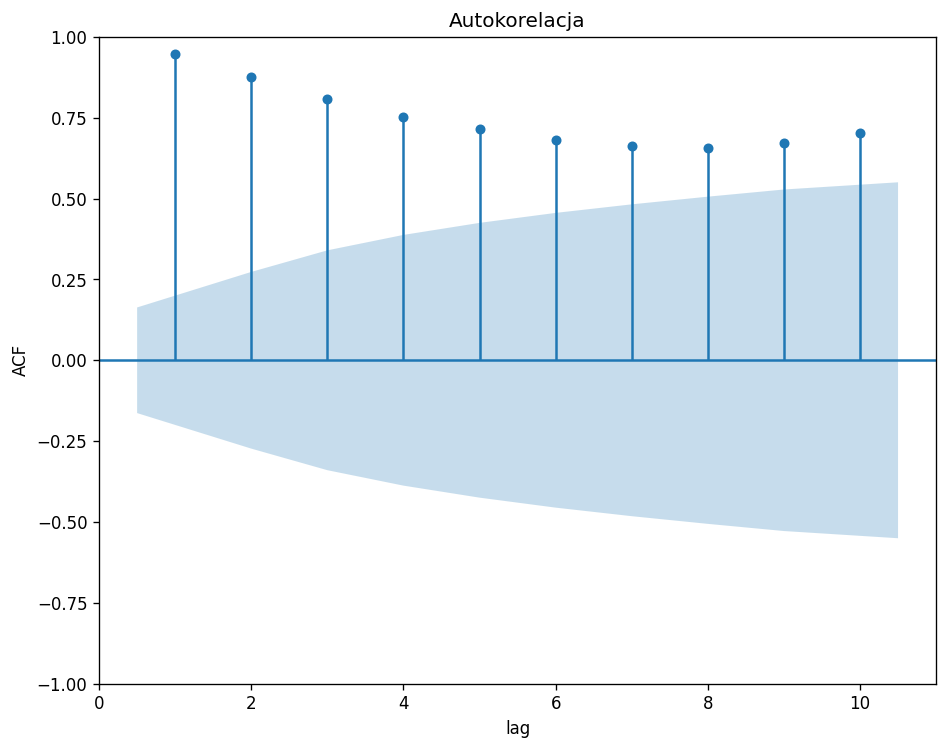

In [23]:
# 5. Wykonanie wykresu autokorelacji
#Importowanie wykresu autokorelacji
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(y,zero=False, lags=10)
# naming the x axis 
plt.xlabel('lag') 
# naming the y axis 
plt.ylabel('ACF') 
# giving a title to my graph 
plt.title('Autokorelacja') 
plt.show()

#Obserwujemy dodatnią autokorelację

d:\Education\3 rok AGH\5 Semestr\AiBD\pandas_project\studysession\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


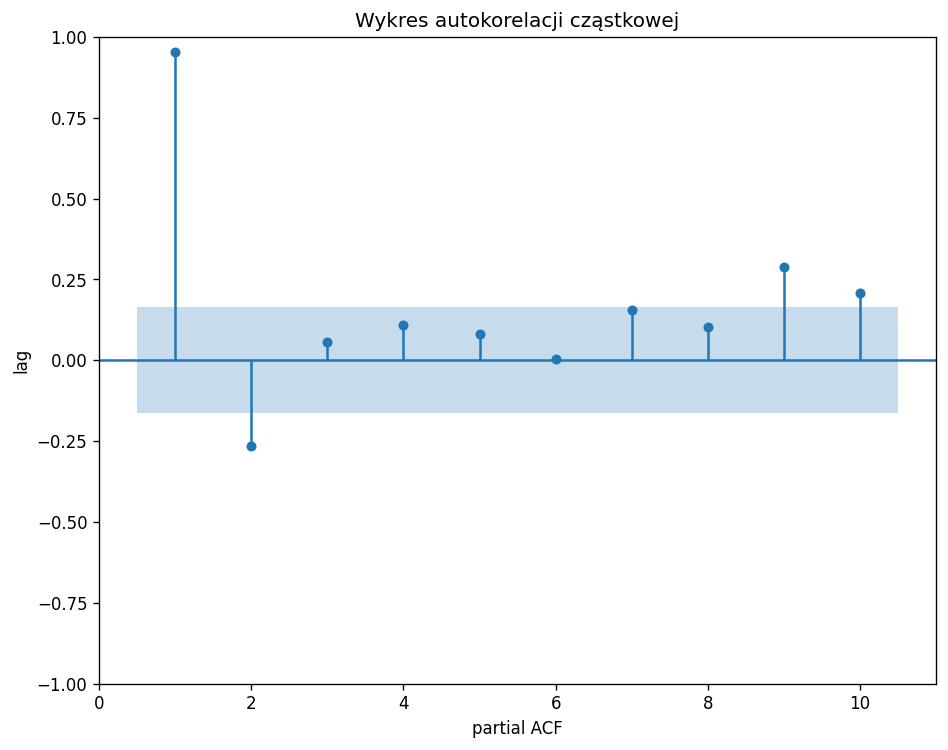

In [24]:
#Wykonanie wykresu PACF(cząstkowa autokorelacja)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(y,zero = False, lags = 10)
# naming the x axis 
plt.xlabel('partial ACF') 
# naming the y axis 
plt.ylabel('lag') 
# giving a title to my graph 
plt.title('Wykres autokorelacji cząstkowej') 
plt.show()

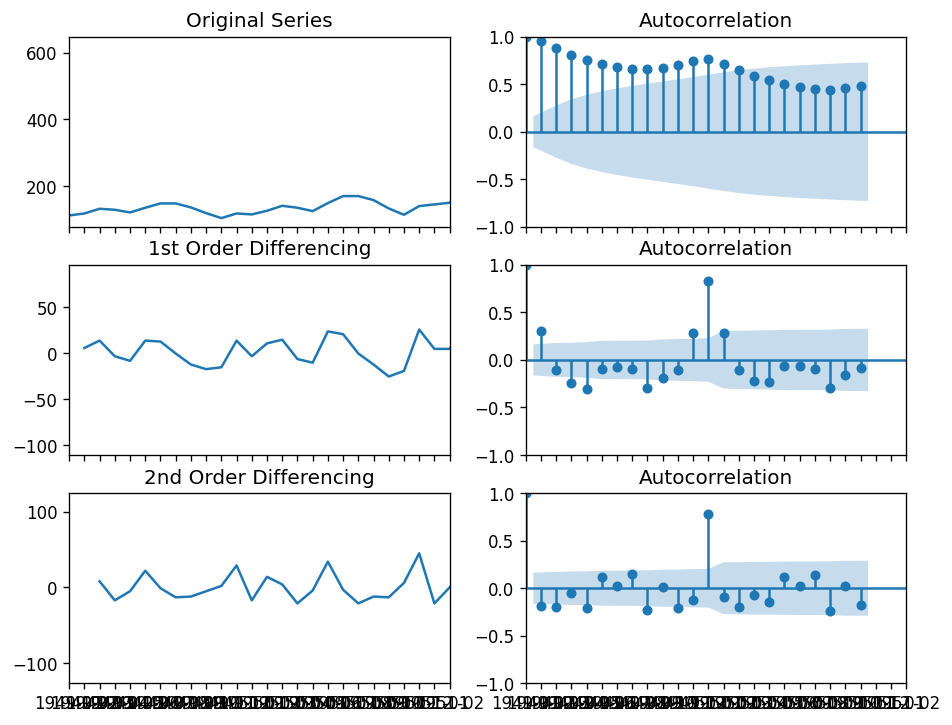

In [25]:
# Inne przedstawienia wykresów korelacji
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1.value); axes[0, 0].set_title('Original Series')
plot_acf(df1.value, ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(df1.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df1.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1.value.diff().diff().dropna(), ax=axes[2, 1])
plt.xlim([0, 25])
plt.show()


d:\Education\3 rok AGH\5 Semestr\AiBD\pandas_project\studysession\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  143
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -689.789
Date:                Thu, 08 Dec 2022   AIC                           1391.579
Time:                        15:16:05   BIC                           1409.356
Sample:                             0   HQIC                          1398.803
                                - 143                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        279.2207     50.916      5.484      0.000     179.427     379.015
ar.L1          0.5341      0.116      4.604      0.000       0.307       0.762
ar.L2          0.5377      0.132      4.078      0.0

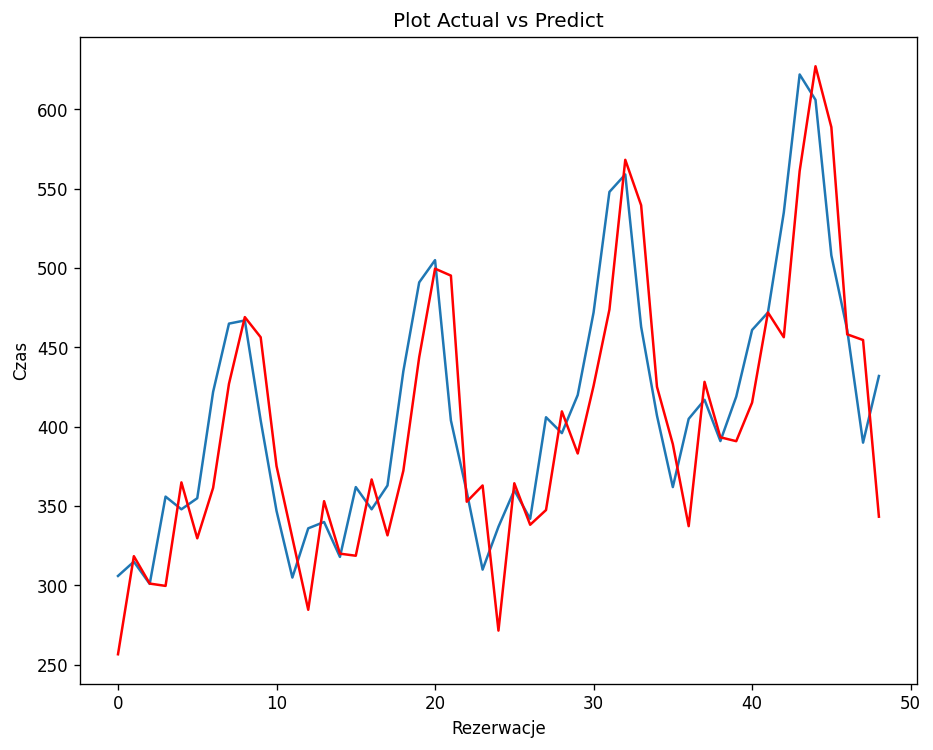

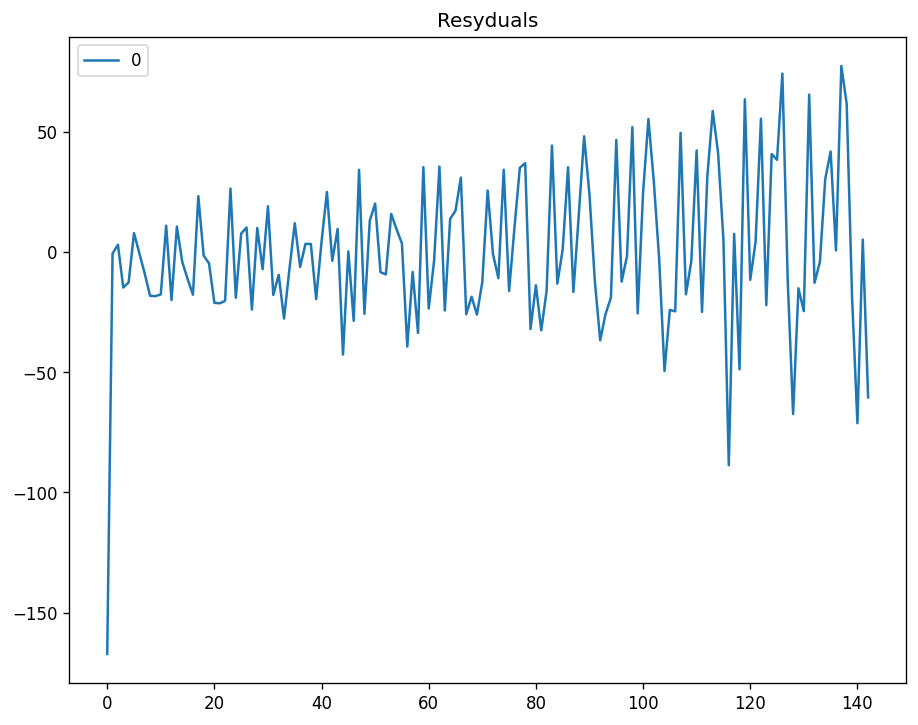

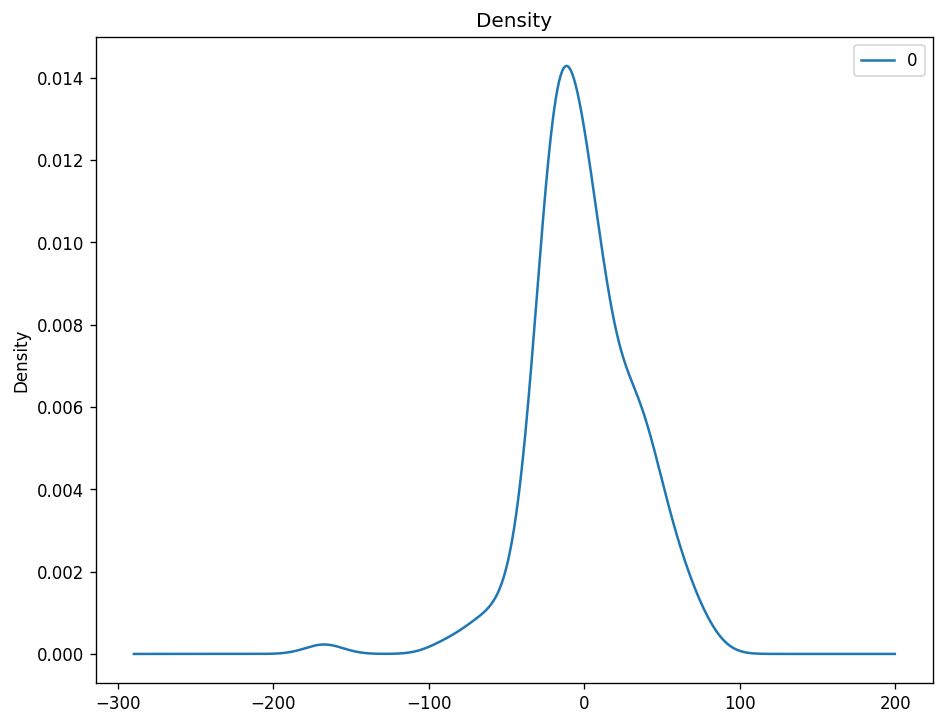

                0
count  143.000000
mean    -0.125764
std     32.803933
min   -167.220709
25%    -18.573421
50%     -3.721184
75%     19.560117
max     77.389859


In [26]:
#7. Dzielinie danych na zbióry treningowe i testowe oraz liczenie AIC dla modelu ARIMA.
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

# Importujemy inne biblioteki skoro podane w ćwiczniu nie dzialają 
import statsmodels.api as sm
X = df1.values
# train = X[0:106] # dane treningowe
# test = X[106:]  #dane testowe
# predictions = [train, test]
# pred = list()
# model = sm.tsa.arima.ARIMA(df1, order=(3,0,1))
# results = model.fit()
# print(results.summary())
#Oddzielne wydrukowanie AIC 
# print(results.aic)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = model = sm.tsa.arima.ARIMA(history, order=(3,0,1))
	results = model.fit()
	output = results.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
print(results.summary())
#Oddzielne wydrukowanie AIC 
print(results.aic)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.xlabel('Rezerwacje') 
plt.ylabel('Czas') 
plt.title('Plot Actual vs Predict') 

pyplot.show()

residuals = DataFrame(results.resid)
residuals.plot()

plt.title('Resyduals') 
pyplot.show()
residuals.plot(kind='kde')

plt.title('Density') 
pyplot.show()
print(residuals.describe())

# w poleceniu order=(3,0,1)) zadajemy parametry dla naszego modelu. W literaturze to się oznacza jako d p i q. 

# ACF pomoże nam określić q, ponieważ na podstawie jego korelogramu można określić liczbę współczynników autokorelacji znacznie różniących się od 0 w modelu MA
# PACK pomoże nam określić p, ponieważ na podstawie jego korelogramu można określić maksymalną liczbę współczynników znacznie różniącą się od 0 w modelu AR.
# d - odpowiada za ilość różnicować szeregu czasowego, aby układ był stacjonarny
# p - odpowiada za rząd modełu, czyli jak wiele wartości będzie uwzględznione z poprzednej obserwacji dla predykowania obecnej
# q - jest kolejnością średniej ruchomej 
# W instrukcji nam były podane te parametry z góry, ale jak by ich nie było, to możemy ich dostać z analizy wykresów autokorelacji
# cząstkowej i modełow AR I MA. 


 

In [27]:
#8. Dobieranie najlepszego modełu poprzez AUTO-ARIMA. 
resultss=pm.auto_arima(df1, exogenous=None, seasonal=False, m=1, d=1, D=1,   #pm.auto.arima
                     max_p=4, max_q=3, trace=True, error_action='ignore', 
                     suppress_warning=True)
print(resultss.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [28]:
# Mamy do czynienie z plikiem analiza.csv zawierający informacje o ilości rezerwacji w poszczególnych mieśiącach z 1949 do 1960 roku.
# Odczytaliśmy zawartość pliku z dopomocą funkcji read_csv oraz funkcji head. Wstępne informacje statystyczne uszyskaliśmy przez funkcje len()
# describe(), shape.  
# Graficzna interpretacja wyników w formie wyrkesu plt.plot daje informacje o tym, że szereg jest niestacjionarny, i w czasie wzrasta srednia,
# warjancja i kowarjancja, możemy zauważyć charakter sezonowy. Oraz widoczna jest tendencja.
# Dalej przeprowadzamy test na stacjonarność układu, jednym z najpopularnejszych jest ADF i czym jest mniej tym lepej.
# Równiez badamy pvalue, patrzymy na tą wartość, w przypadku kiedy jest mniejsza od 0.05, to możemy odrzucić hipotezę zerową 
# i stwierdzić, że szereg jest stacjonarny, w przeciwnym przypadku musimy szukać kolejność różnicowania.
# Akurat mamy powyżej 0.05.as_integer_ratio

# w poleceniu order=(3,0,1)) zadajemy parametry dla naszego modelu. W literaturze to się oznacza jako d p i q. 

# ACF pomoże nam określić q, ponieważ na podstawie jego korelogramu można określić liczbę współczynników autokorelacji znacznie różniących się od 0 w modelu MA
# PACK pomoże nam określić p, ponieważ na podstawie jego korelogramu można określić maksymalną liczbę współczynników znacznie różniącą się od 0 w modelu AR.
# d - odpowiada za ilość różnicować szeregu czasowego, aby układ był stacjonarny
# p - odpowiada za rząd modełu, czyli jak wiele wartości będzie uwzględznione z poprzednej obserwacji dla predykowania obecnej
# q - jest kolejnością średniej ruchomej 
# W instrukcji nam były podane te parametry z góry, ale jak by ich nie było, to możemy ich dostać z analizy wykresów autokorelacji
# cząstkowej i modełow AR I MA. 

# Jak mamy wyznaczone albo podane(jak w naszym przypadku) parametry d p i q, stworzyliśmy modeł ARIMA i wyprowadziliśmy dla niego metryki
# Patrząc na wykres predykcji, gdzie wartości aktualne zaznaczone na niebiesko, a predykowane - na czerwono. Możemy wnioskować,
# że model dobrze poradził skoro widzimy, że dwa wykresy podobne, również zaznaczamy dodatkowe metryki określające wielkość błędów(wykresy
# Resyduals i Density)
# Dalej zgodnie z instrukcją przeprowadzamy procedurę według wyznaczenia optymalnych parametrów p d i q, i patrzymy na wartość ACF,
# tzn. gdzie jest najmniejsza ten model nam najbardziej pasuje w naszym przypadku to ARIMA(4,1,3) 